# Individual Project Planning Assignment - Ada Breker
November 13, 2025

**(1) Data Description**

<u>Players dataset<u>

- Data collected using a website embedded with Minecraft, players inputted their personal data and website tracked players time in game
- 196 observations
- 7 variables


$$\text{Overview Table}$$

| Variable name | Type of variable | What variable means | Summary statistics (if applicable) |
| :------- | :------: | -------: |-------: |
| Experience | Character | The experience each player has | NA |
| Subscribe | Logical | Whether the player has subscribed to a game-related newsletter | FALSE: 52, TRUE: 144  |
| Hashed email | Character | The encrypted email each player put in | NA |
| Played hours | Double | The number of hours each player played | Min: 0.00, Median: 0.10, Mean: 5.85, Max: 223.10 |
| Name | Character | The players names | NA |
| Gender | Character | The self-identified gender of each player | NA |
| Age | Double | Each players age | Min: 9.00, Median: 19.00, Mean: 21.14, Max: 58.00 |


-
Problems in the data
    * Somewhat small dataset
   * Played hours has a majority of zero hours, not enough non zero observations, hard to use as a variable
  * Majority of the players self-identify as male
 * The age of players is also skewed towards 17-19

**(2) Questions** 

Broad question: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

Specific question: Can player age and experience predict if a player will subscribe to a game-related newsletter in the Players data set?

**(3) Exploratory Data Analysis and Visualization** 

(Mean values shown in summary statistics above)

In [4]:
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [5]:
players <- read_csv("players.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [6]:
summary(players)

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

In [11]:
# Select columns needed for future analysis, ignore the observations with no values (NAs)
players_selected <- players |>
    na.omit(df) |>
    select(subscribe, experience, Age)
players_selected

subscribe,experience,Age
<lgl>,<chr>,<dbl>
TRUE,Pro,9
TRUE,Veteran,17
FALSE,Veteran,17
TRUE,Amateur,21
TRUE,Regular,21
TRUE,Amateur,17
TRUE,Regular,19
FALSE,Amateur,21
TRUE,Amateur,47


List of 1
 $ text:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 25
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

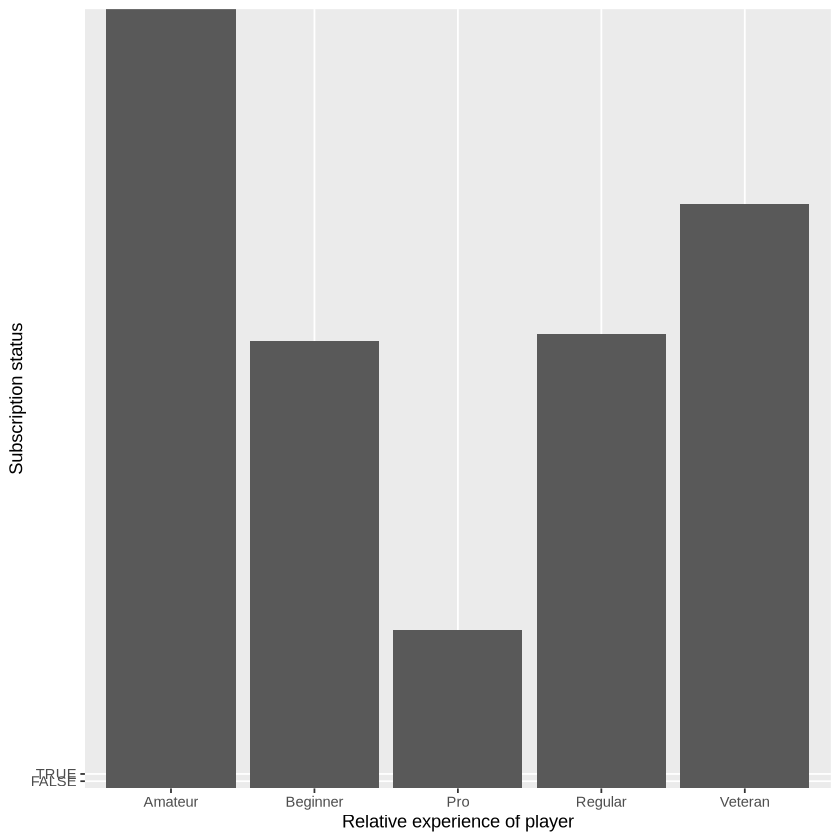

In [14]:
# Lets if there is a connection between experience and subscription first
experience_plot <- players_selected |>
    ggplot(aes(x = experience, y = subscribe)) +
    geom_bar(stat = "identity") +
    xlab("Relative experience of player") +
    ylab("Subscription status")
    theme(text = element_text(size = 25))
experience_plot

**(4) Methods and Plan** 

I plan to use regression (most likely knn regression as the data set is small) predict if a player will subscribe to a game-related newsletter based on their age and experience level. 